In [ ]:
!curl -L -O https://github.com/hromi/SMILEsmileD/archive/master.zip
!unzip -q master.zip
!rm master.zip

In [1]:
from utils import list_all_files
negative_paths = list(list_all_files('SMILEsmileD-master/SMILEs/negatives/negatives7/', ['.jpg']))
positive_paths = list(list_all_files('SMILEsmileD-master/SMILEs/positives/positives7/', ['.jpg']))
examples = [(path, 0) for path in negative_paths] + [(path, 1) for path in positive_paths]

In [2]:
import numpy as np
from skimage.measure import block_reduce
from skimage.io import imread
block_size = 2
X = []
y = []
for path, label in examples:
    img = imread(path, as_grey=True)
    img = block_reduce(img, block_size=(block_size, block_size), func=np.mean)
    X.append(img)
    y.append(label)
X = np.asarray(X).astype(np.float32) / 255.
y = np.asarray(y).astype(np.int32).reshape(-1, 1)

In [3]:
print X.dtype, X.min(), X.max(), X.shape
print y.dtype, y.min(), y.max(), y.shape

float32 0.0 1.0 (13165, 32, 32)
int32 0 1 (13165, 1)


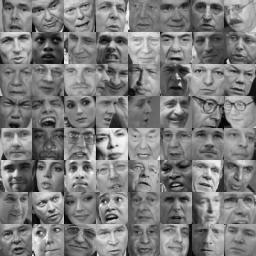

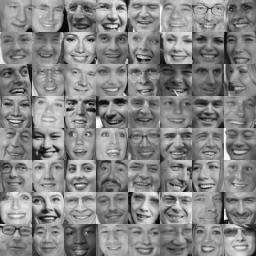

In [4]:
from utils import make_mosaic, show_array
show_array(255 * make_mosaic(X[:len(negative_paths)], 8), fmt='jpeg') # negative at the beginning
show_array(255 * make_mosaic(X[-len(positive_paths):], 8), fmt='jpeg') # positive at the end

In [5]:
np.save('X.npy', X)
np.save('y.npy', y)